In [1]:
import pandas as pd
import numpy as np

In [2]:
barueri = pd.read_csv('files/database/barueri_dengue.csv')
barueri = barueri[['data_iniSE', 'umidmin','umidmed', 'umidmax', 'tempmin','tempmed','tempmax', 'casos']]
barueri.head()

,data_iniSE,umidmin,umidmed,umidmax,tempmin,tempmed,tempmax,casos
0,2023-03-19,49.505306,78.334258,95.789630,18.615385,22.551282,28.461538,70
1,2023-03-12,89.528829,91.672330,94.167729,20.272727,20.659091,20.954545,39
2,2023-03-05,85.850233,88.515176,90.930317,20.571429,20.976191,21.428571,54
3,2023-02-26,85.418803,85.829629,86.249999,22.086957,22.268116,22.565217,29
4,2023-02-19,63.334366,86.488957,99.304751,18.730769,21.795150,26.653846,21


In [3]:
wheater_data = pd.read_csv('files/database/combined_data.csv')["PRECIPITA TOTAL, HORARIO (mm)"]
wheater_data.head()

0    20.6
1    99.0
2    32.0
3    25.4
4    65.0
Name: PRECIPITA TOTAL, HORARIO (mm), dtype: float64

In [4]:
barueri.describe()

,umidmin,umidmed,umidmax,tempmin,tempmed,tempmax,casos
count,613.000000,613.000000,613.000000,626.000000,613.000000,613.000000,626.000000
mean,63.104150,83.899070,97.329664,15.971292,19.087378,23.556950,40.420128
std,17.787463,8.322680,2.933025,3.067470,3.026821,4.245223,130.843776
min,24.571429,57.712619,79.989202,6.714286,8.791882,11.285714,0.000000
25%,49.020343,77.882259,96.000000,13.571429,17.026172,21.000000,4.000000
50%,59.714286,83.783095,98.272040,16.357143,19.297619,23.571429,8.000000
75%,81.285714,90.895962,99.151789,18.571429,21.327854,26.571429,18.000000
max,96.571429,98.957787,100.000000,22.142857,27.254048,34.714286,1227.000000


In [5]:
# barueri['casos'].to_csv('barueri_dengue_filtered.csv', index=False)

In [6]:

barueri_filtered_wheater = pd.concat([barueri, wheater_data], axis=1)
barueri_filtered_wheater.head()
barueri_filtered_wheater.to_csv('files/database/barueri_dengue_filtered.csv', index=False)

In [7]:
barueri_filtered_wheater['data_iniSE'] = pd.to_datetime(barueri_filtered_wheater['data_iniSE'])

In [8]:
# casos = barueri_filtered_wheater['casos'].iloc[:-3].reset_index(drop=True)
# barueri_filtered_wheater = barueri_filtered_wheater.iloc[3:].drop(columns=['casos']).reset_index(drop=True)
# barueri_filtered_wheater = pd.concat([barueri_filtered_wheater, casos], axis=1)


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

(623, 9)


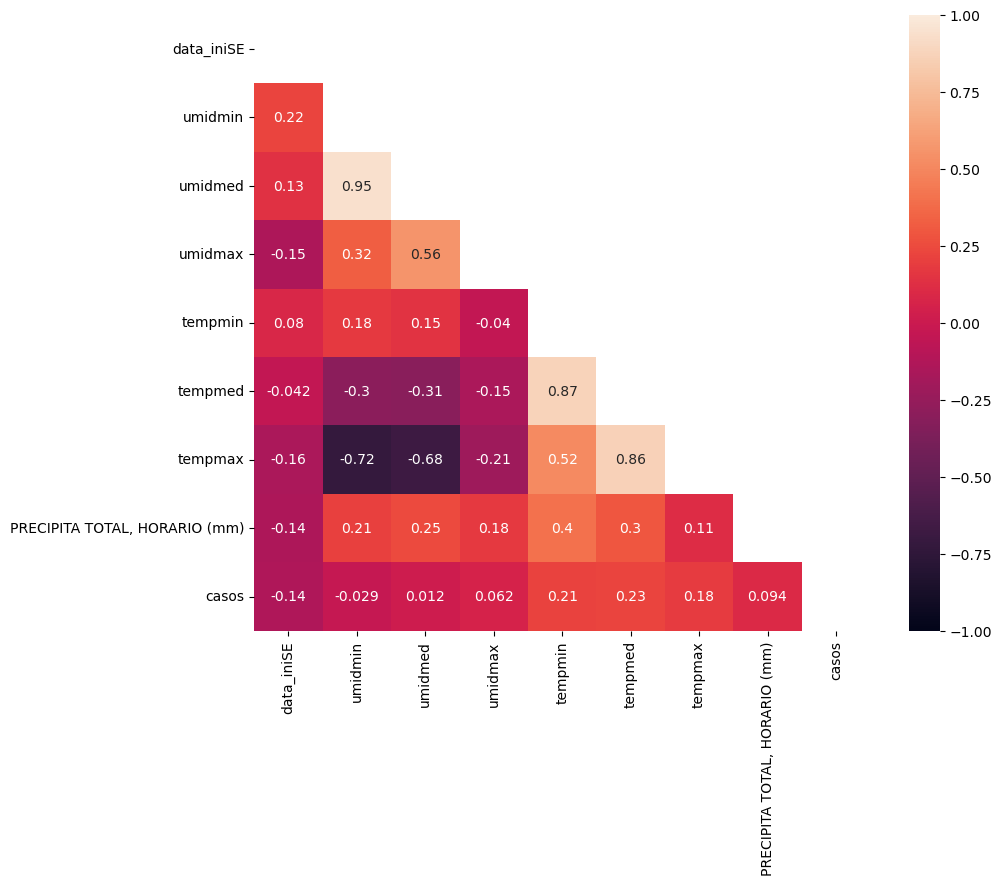

In [10]:
print(barueri_filtered_wheater.shape)
mask = np.triu(np.ones_like(barueri_filtered_wheater.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(barueri_filtered_wheater.corr(), mask=mask, square=True, vmin=-1, vmax=1, annot=True)

# plt.figure(figsize=(10, 10))
# sns.heatmap(cov_matrix, annot=True, fmt='.2f', cmap='coolwarm')
# plt.title('Covariance matrix')
plt.show()

In [11]:
barueri_filtered_wheater['month'] = barueri_filtered_wheater['data_iniSE'].dt.strftime('%b')
barueri_filtered_wheater.head()

,data_iniSE,umidmin,umidmed,umidmax,tempmin,tempmed,tempmax,"PRECIPITA TOTAL, HORARIO (mm)",casos,month
0,2023-02-26,85.418803,85.829629,86.249999,22.086957,22.268116,22.565217,25.4,70,Feb
1,2023-02-19,63.334366,86.488957,99.304751,18.730769,21.795150,26.653846,65.0,39,Feb
2,2023-02-12,85.166191,86.695892,88.244707,21.882353,22.215686,22.588235,121.4,54,Feb
3,2023-02-05,94.158321,94.585553,95.012784,20.857143,20.928571,21.000000,56.4,29,Feb
4,2023-01-29,77.419312,85.952219,91.084692,21.428571,22.273809,23.857143,103.8,21,Jan


/home/eliabe/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


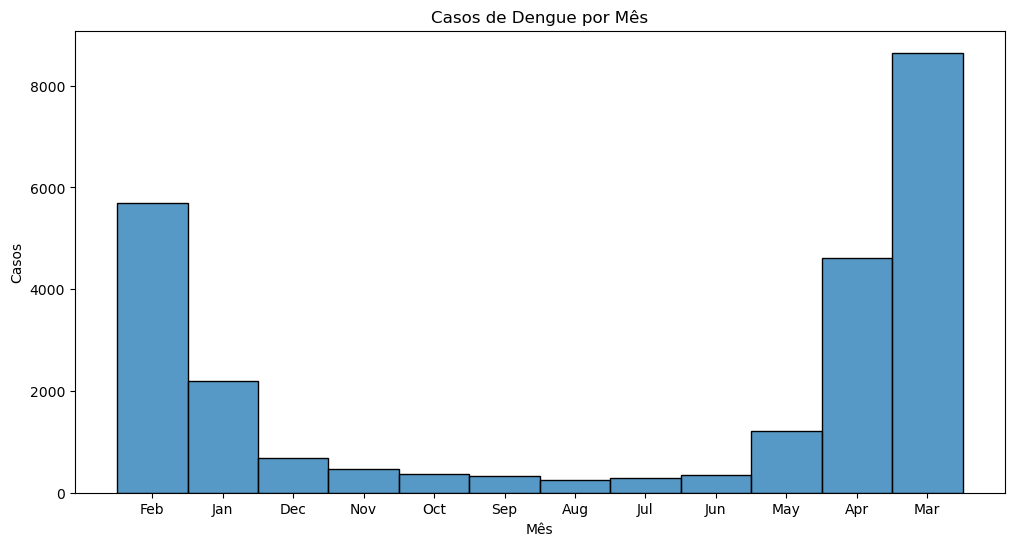

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(data=barueri_filtered_wheater, x='month', weights='casos', bins=12, kde=False)
plt.title('Casos de Dengue por Mês')
plt.xlabel('Mês')
plt.ylabel('Casos')
plt.show()